In [1]:
### Compare different MOFA versions: with clinical features and without

#############################################
# Prerequisites - Load Libraries

In [2]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'”


[1] "/home/icb/corinna.losert/miniconda3/envs/stark_stemi_R_Env_4_1//lib/R/library"



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
   

In [3]:
source('MS4_Plot_Config.r')

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


###############################################
# Preqrequisites Configurations & Parameters

In [8]:
data_path = '../data/current'

In [9]:
result_path = '../results/current'

In [10]:
data_path

[1] "../data/current"

In [11]:
name = 'V_FINAL_INTEGRATED'  # name of dataset to load

# Load Data 

In [12]:
### Factor and Weight Data from Version with clinical dta

In [13]:
path =  paste0(result_path, '/E-Analysis/Factor_Data_' , name,'_', FALSE,  '.csv')
factor_data = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-03 14:34:39 CET"


In [14]:
path = paste0(result_path, '/E-Analysis/Weight_Data_' , name, '_', FALSE, '.csv')
weight_data = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-03 14:34:43 CET"


In [15]:
### Factor and Weight Data from Version without clinical data

In [16]:
path = paste0(result_path, '/E-Analysis/Factor_Data_w_o_clinical' , name,'_', FALSE,  '.csv')
factor_data_w_o_clinical = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-03 15:05:46 CET"


In [17]:
path = paste0(result_path, '/E-Analysis/Weight_Data_w_o_clinical' , name, '_', FALSE, '.csv')
weight_data_w_o_clinical = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-03 15:05:51 CET"


# Comparisons

## Correlation of factors

In [18]:
head(factor_data,2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,⋯,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,sample_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.4811325,-0.2731317,1.4988169,-0.4135678,1.5052706,-0.92308998,-0.3904185,-0.1944797,0.16486799,-0.5581300,⋯,1.3718758,0.1882956,-0.3082163,-0.47997108,0.3468897,0.5692611,0.416665730,-0.60204874,-0.03085489,k1
2,0.8920603,-0.7547770,0.3501023,-0.1524478,0.4074517,-0.04596939,0.6276925,-1.1656937,-0.05003504,-0.3380343,⋯,-0.1020285,0.1199118,0.2096718,0.09246619,0.1335110,-0.0490552,-0.001722867,0.07838055,-0.03818913,k10


In [19]:
head(factor_data_w_o_clinical,2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,⋯,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,sample_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.2399255,-0.05739971,1.4907896,-0.32665242,1.267384,-0.76449296,-0.2062638,-0.4015635,0.13934268,-0.5942366,⋯,1.3987023,-0.2781827,0.3304071,0.1524369,0.343907604,0.59804301,-0.63067345,-0.48486844,-0.20108153,k1
2,0.9120340,-0.73742041,0.3457404,-0.08340577,0.397841,-0.03302189,-1.1732596,0.6276986,-0.05103549,-0.3492411,⋯,-0.1025336,0.2056910,0.1377031,0.1219240,-0.007729483,-0.04886579,0.07816087,0.09603544,-0.03821721,k10


In [20]:
colnames(factor_data_w_o_clinical) = paste0(colnames(factor_data_w_o_clinical), 'w_o_clinical')

In [21]:
factors_combined = merge(factor_data, factor_data_w_o_clinical, by.x = 'sample_id', by.y = 'sample_idw_o_clinical')

In [22]:
nrow(factors_combined)

[1] 128

In [23]:
head(factors_combined)

,sample_id,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,⋯,Factor11w_o_clinical,Factor12w_o_clinical,Factor13w_o_clinical,Factor14w_o_clinical,Factor15w_o_clinical,Factor16w_o_clinical,Factor17w_o_clinical,Factor18w_o_clinical,Factor19w_o_clinical,Factor20w_o_clinical
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,k1,0.4811325,-0.2731317,1.4988169,-0.4135678,1.5052706,-0.92308998,-0.3904185,-0.19447969,0.164867991,⋯,-0.05194047,1.398702331,-0.27818268,0.33040710,0.15243694,0.343907604,0.59804301,-0.63067345,-0.48486844,-0.20108153
2,k10,0.8920603,-0.7547770,0.3501023,-0.1524478,0.4074517,-0.04596939,0.6276925,-1.16569374,-0.050035038,⋯,-0.01582432,-0.102533562,0.20569099,0.13770309,0.12192402,-0.007729483,-0.04886579,0.07816087,0.09603544,-0.03821721
3,k11,-1.2439808,-0.9826224,-0.8230479,-0.3559941,1.0458397,0.11800347,-0.2770340,-0.19013233,-0.109596117,⋯,0.02304043,-0.015950130,0.04337330,-0.01056540,-0.03441536,0.174703060,0.03304282,0.10881924,-0.01643461,-0.02860477
4,k12,-1.9847781,-1.6711527,-1.0857874,-0.4570102,0.6403206,-0.37214375,-0.9344379,-0.19164419,0.036760715,⋯,0.15012540,0.001733234,0.14569132,0.02787915,0.03876406,0.295217704,0.01888906,-0.15746099,0.48965351,-0.10732197
5,k13,-0.1151065,-0.6049663,-1.0757514,0.2528200,0.9996823,0.18219803,0.1165207,-0.43359749,0.009879488,⋯,-0.01499533,-0.044164453,0.08615848,-0.14081600,-0.20128156,0.152224923,-0.03360295,-0.19673346,-0.05667137,0.12189720
6,k14,1.7202884,-1.0439370,-0.4129450,0.4372901,-0.3166721,0.18048541,0.5870578,-0.07855377,0.078069027,⋯,0.11155881,0.011087358,0.10619924,-0.36647114,-0.04515610,-0.042144473,-0.08188111,-0.16157832,-0.01446810,0.18374978


In [24]:
factors_combined$sample_id = NULL

In [25]:
correlations = cor(factors_combined ,method = 'pearson',  use = "pairwise.complete.obs")

In [26]:
correlations = correlations[rownames(correlations) %in% colnames(factor_data),colnames(correlations) %in% colnames(factor_data_w_o_clinical)] 

In [27]:
head(correlations,2)

,Factor1w_o_clinical,Factor2w_o_clinical,Factor3w_o_clinical,Factor4w_o_clinical,Factor5w_o_clinical,Factor6w_o_clinical,Factor7w_o_clinical,Factor8w_o_clinical,Factor9w_o_clinical,Factor10w_o_clinical,Factor11w_o_clinical,Factor12w_o_clinical,Factor13w_o_clinical,Factor14w_o_clinical,Factor15w_o_clinical,Factor16w_o_clinical,Factor17w_o_clinical,Factor18w_o_clinical,Factor19w_o_clinical,Factor20w_o_clinical
Factor1,0.99927146,-0.03539319,-0.01769203,-0.008411804,-0.007067446,-0.02534856,-0.13679659,-0.02173373,-0.01162820,0.003976814,0.047200048,0.002224085,0.01501283,-0.01340428,0.04166814,0.01259856,0.001043841,0.008065295,-0.02714259,0.01172162
Factor2,-0.04372627,0.99887923,-0.03275913,-0.038656319,-0.063880356,-0.03913053,-0.03939819,-0.08858922,0.03867616,-0.014078772,-0.009767095,-0.060667113,0.09381867,0.11622318,0.01511778,0.03451961,-0.047539734,0.070818395,0.09078856,0.02624502


In [28]:
#### Plot complete explained variance

In [29]:
figure_name = "SUPP4_Correlation_Factor_Values_Mofa_Models"

In [30]:
# Sizes of the plot
width_par = 8
height_par = 5.5

In [32]:
## Order by sizes
col_order = c('Factor1w_o_clinical', 'Factor2w_o_clinical', 'Factor3w_o_clinical','Factor4w_o_clinical',
                               'Factor5w_o_clinical', 'Factor6w_o_clinical', 'Factor8w_o_clinical', 'Factor7w_o_clinical',
              'Factor9w_o_clinical', 'Factor10w_o_clinical', 'Factor11w_o_clinical', 'Factor12w_o_clinical',
              'Factor15w_o_clinical',  'Factor13w_o_clinical',  'Factor19w_o_clinical',  'Factor14w_o_clinical',  'Factor17w_o_clinical',
             'Factor16w_o_clinical', 'Factor18w_o_clinical', 'Factor20w_o_clinical')
correlations = correlations[,col_order]

In [33]:
pdf(paste0('figures/Supplementary_Figures/', figure_name, name, '.pdf'), width =width_par, height =height_par)
correlation_plot = corrplot(correlations, method = 'number', title = '',  pch =4,   mar=c(0,0,2,0), number.cex = 0.5, tl.cex = 0.5, cl.cex = 0.5)
dev.off()

png 
  2

## Correlation Features

In [34]:
colnames(weight_data_w_o_clinical) = paste0(colnames(weight_data_w_o_clinical), 'w_o_clinical')

In [35]:
head(weight_data,2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,⋯,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,type,variable_name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,-0.13418597,0.4019222,-0.1010765,-0.002177566,-0.5093667,0.24179134,-0.03635097,0.05304519,0.0011574664,-0.012307130,⋯,-0.1604505,-0.001418618,0.1540945,0.003821864,-0.24205661,0.004092582,-0.0005618720,-0.2423944,clinical_data,CK
2,-0.06222621,0.2731985,-0.2000362,-0.076098327,-0.1439445,0.04289833,-0.71818597,0.18658970,-0.0007753517,-0.003074308,⋯,-0.6107162,0.002499494,0.3864464,-0.001090137,-0.08311704,0.009503498,-0.0003621744,0.2060158,clinical_data,CK_MB


In [36]:
weights_combined = merge(weight_data, weight_data_w_o_clinical, by.x = c('type', 'variable_name'), by.y = c('typew_o_clinical', 'variable_namew_o_clinical'))

In [37]:
head(weights_combined)

,type,variable_name,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,⋯,Factor11w_o_clinical,Factor12w_o_clinical,Factor13w_o_clinical,Factor14w_o_clinical,Factor15w_o_clinical,Factor16w_o_clinical,Factor17w_o_clinical,Factor18w_o_clinical,Factor19w_o_clinical,Factor20w_o_clinical
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cytokine,BCA1__CXCL13,0.007978853,0.02443140,-0.01729291,-0.28710607,-0.06740164,-0.04226999,-0.03493591,0.02324887,⋯,-7.381671e-04,-0.005648692,0.50467277,0.04324221,0.66618818,-0.041123314,-0.20769065,0.1357149,-0.057941823,-0.009094946
2,cytokine,CTACK__CCL27,0.015216616,-0.17599838,0.02830920,-0.00852578,0.07248504,-0.05209972,-0.03711610,0.03559665,⋯,-2.412221e-03,0.004031660,0.09532608,-0.05772901,0.02019500,-0.004542783,0.03819823,0.2465448,-0.035179816,0.198791111
3,cytokine,EGF__EGF,0.013673086,0.07760928,0.30373924,-0.01078296,0.02232099,0.02009437,0.01830534,-0.06732902,⋯,-5.682378e-03,0.003849454,-0.13054432,-0.04393506,0.05949257,0.192073260,0.14709128,-0.1076397,0.012069523,-0.046886321
4,cytokine,ENA78__CXCL5,0.020450195,-0.14861746,0.08744844,0.04475802,0.34629293,-0.05318961,-0.13378093,0.02442531,⋯,-1.047666e-03,0.015654410,0.04220040,-0.17565499,-0.01976871,0.094401255,0.09715927,-0.0318891,-0.003100847,0.064869776
5,cytokine,Eotaxin__CCL11,-0.009040143,-0.10062609,-0.06195454,0.33567008,0.01772261,0.24874685,-0.07021537,0.02484327,⋯,-4.022177e-03,-0.001990257,0.11033425,0.01974583,-0.08829089,0.136907069,1.19791046,-0.2583526,-0.026735540,0.280409422
6,cytokine,Eotaxin2__CCL24,0.003145437,-0.04356660,0.11104902,-0.54586544,0.12349054,-0.04016319,-0.04900908,-0.03401423,⋯,-6.908992e-05,-0.001332280,0.08320845,-0.07552793,0.05944623,-0.189669727,-0.03115842,0.1189911,0.010319956,-0.024299572


In [38]:
nrow(weights_combined)

[1] 13278

In [39]:
weights_combined$type = NULL
weights_combined$variable_name = NULL

In [40]:
head(weights_combined,2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,⋯,Factor11w_o_clinical,Factor12w_o_clinical,Factor13w_o_clinical,Factor14w_o_clinical,Factor15w_o_clinical,Factor16w_o_clinical,Factor17w_o_clinical,Factor18w_o_clinical,Factor19w_o_clinical,Factor20w_o_clinical
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.007978853,0.0244314,-0.01729291,-0.28710607,-0.06740164,-0.04226999,-0.03493591,0.02324887,-0.09583979,-0.1544842,⋯,-0.0007381671,-0.005648692,0.50467277,0.04324221,0.6661882,-0.041123314,-0.20769065,0.1357149,-0.05794182,-0.009094946
2,0.015216616,-0.1759984,0.02830920,-0.00852578,0.07248504,-0.05209972,-0.03711610,0.03559665,-0.26321420,-0.0240123,⋯,-0.0024122213,0.004031660,0.09532608,-0.05772901,0.0201950,-0.004542783,0.03819823,0.2465448,-0.03517982,0.198791111


In [41]:
correlations = cor(weights_combined ,method = 'pearson',  use = "pairwise.complete.obs")

In [42]:
correlations = correlations[rownames(correlations) %in% colnames(weight_data),colnames(correlations) %in% colnames(weight_data_w_o_clinical)] 

In [43]:
head(correlations,2)

,Factor1w_o_clinical,Factor2w_o_clinical,Factor3w_o_clinical,Factor4w_o_clinical,Factor5w_o_clinical,Factor6w_o_clinical,Factor7w_o_clinical,Factor8w_o_clinical,Factor9w_o_clinical,Factor10w_o_clinical,Factor11w_o_clinical,Factor12w_o_clinical,Factor13w_o_clinical,Factor14w_o_clinical,Factor15w_o_clinical,Factor16w_o_clinical,Factor17w_o_clinical,Factor18w_o_clinical,Factor19w_o_clinical,Factor20w_o_clinical
Factor1,0.99994138,-0.01193803,-0.03000726,-0.00157491,-0.023660711,-0.02281879,-0.1616654,-0.002770267,0.02623794,-0.016628678,0.002361766,0.01234134,0.06553360,-0.006064625,0.06895048,0.018254138,0.009668855,0.025223735,-0.06791544,0.0028156719
Factor2,-0.01805394,0.99968559,-0.01192607,-0.03549754,0.006979927,0.04399989,-0.1033971,-0.003894888,0.03295327,0.008978363,-0.004608420,0.01068829,0.06870542,0.040921445,-0.02442512,0.002687914,0.025409375,-0.002921966,0.05273592,-0.0008079201


In [48]:

col_order = c('Factor1w_o_clinical', 'Factor2w_o_clinical', 'Factor3w_o_clinical','Factor4w_o_clinical',
                               'Factor5w_o_clinical', 'Factor6w_o_clinical', 'Factor8w_o_clinical', 'Factor7w_o_clinical',
              'Factor9w_o_clinical', 'Factor10w_o_clinical', 'Factor11w_o_clinical', 'Factor12w_o_clinical',
              'Factor15w_o_clinical',  'Factor13w_o_clinical',  'Factor19w_o_clinical',  'Factor14w_o_clinical',  'Factor17w_o_clinical',
             'Factor16w_o_clinical', 'Factor18w_o_clinical', 'Factor20w_o_clinical')
correlations = correlations[,col_order]

In [49]:
#### Plot complete explained variance

In [50]:
figure_name = "SUPP4_Correlation_Feature_Weight_Values_Mofa_Models"

In [51]:
# Sizes of the plot
width_par = 8
height_par = 5.5

In [52]:
pdf(paste0('figures/Supplementary_Figures/', figure_name, name, '.pdf'), width =width_par, height =height_par)
correlation_plot = corrplot(correlations, method = 'number', title = '',  pch =4,  mar=c(0,0,2,0), number.cex = 0.5, tl.cex = 0.5, cl.cex = 0.5)
dev.off()

png 
  2

## Overlap top features

In [53]:
head(weight_data,2)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,⋯,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,type,variable_name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,-0.13418597,0.4019222,-0.1010765,-0.002177566,-0.5093667,0.24179134,-0.03635097,0.05304519,0.0011574664,-0.012307130,⋯,-0.1604505,-0.001418618,0.1540945,0.003821864,-0.24205661,0.004092582,-0.0005618720,-0.2423944,clinical_data,CK
2,-0.06222621,0.2731985,-0.2000362,-0.076098327,-0.1439445,0.04289833,-0.71818597,0.18658970,-0.0007753517,-0.003074308,⋯,-0.6107162,0.002499494,0.3864464,-0.001090137,-0.08311704,0.009503498,-0.0003621744,0.2060158,clinical_data,CK_MB


In [54]:
weight_data_long = melt(weight_data)

Using type, variable_name as id variables



In [55]:
head(weight_data_w_o_clinical,2)

,Factor1w_o_clinical,Factor2w_o_clinical,Factor3w_o_clinical,Factor4w_o_clinical,Factor5w_o_clinical,Factor6w_o_clinical,Factor7w_o_clinical,Factor8w_o_clinical,Factor9w_o_clinical,Factor10w_o_clinical,⋯,Factor13w_o_clinical,Factor14w_o_clinical,Factor15w_o_clinical,Factor16w_o_clinical,Factor17w_o_clinical,Factor18w_o_clinical,Factor19w_o_clinical,Factor20w_o_clinical,typew_o_clinical,variable_namew_o_clinical
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0.007872607,0.01834307,-0.01672033,-0.3090944808,-0.04257815,-0.04290609,0.02036166,-0.02911915,-0.09958332,-0.15661780,⋯,0.50467277,0.04324221,0.6661882,-0.041123314,-0.20769065,0.1357149,-0.05794182,-0.009094946,cytokine,BCA1__CXCL13
2,0.016026314,-0.17902272,0.02978679,-0.0001092699,0.08309032,-0.05366863,0.03047595,-0.03859843,-0.26235709,-0.02720419,⋯,0.09532608,-0.05772901,0.0201950,-0.004542783,0.03819823,0.2465448,-0.03517982,0.198791111,cytokine,CTACK__CCL27


In [56]:
weight_data_w_o_clinical_long = melt(weight_data_w_o_clinical)

Using typew_o_clinical, variable_namew_o_clinical as id variables



In [57]:
head(weight_data_long,2)

,type,variable_name,variable,value
,<chr>,<chr>,<fct>,<dbl>
1,clinical_data,CK,Factor1,-0.13418597
2,clinical_data,CK_MB,Factor1,-0.06222621


In [58]:
head(weight_data_w_o_clinical_long,2 )

,typew_o_clinical,variable_namew_o_clinical,variable,value
,<chr>,<chr>,<fct>,<dbl>
1,cytokine,BCA1__CXCL13,Factor1w_o_clinical,0.007872607
2,cytokine,CTACK__CCL27,Factor1w_o_clinical,0.016026314


In [59]:
colnames(weight_data_w_o_clinical_long) = c('type', 'variable_name', 'variable', 'value')

In [60]:
weight_data_long_all =  rbind(weight_data_long, weight_data_w_o_clinical_long)

In [61]:
### Get top features

In [62]:
i =  0.005 ## percentage of top features

In [63]:

## Define amont of top genes per fraction 
geneset_oi_pos_per_factor_analyze =weight_data_long_all %>% group_by(variable) %>% arrange( desc(value),  .by_group = TRUE)  %>% top_frac(i)
geneset_oi_pos_per_factor_analyze$direction = 'positive'

geneset_oi_neg_per_factor_analyze = weight_data_long_all %>% group_by(variable) %>% arrange(desc(value),  .by_group = TRUE)  %>% top_frac(-i)
geneset_oi_neg_per_factor_analyze$direction = 'negative'

geneset_oi_analyze = rbind(geneset_oi_pos_per_factor_analyze, geneset_oi_neg_per_factor_analyze)
geneset_oi_analyze$fraction = i


Selecting by value
Selecting by value


In [64]:
head(geneset_oi_analyze,2)

type,variable_name,variable,value,direction,fraction
<chr>,<chr>,<fct>,<dbl>,<chr>,<dbl>
X0_TcellCD4,X0_T.cell.CD4__PFN1,Factor1,0.5391310,positive,0.005
X0_TcellCD4,X0_T.cell.CD4__CYBA,Factor1,0.5244921,positive,0.005


In [65]:
geneset_oi_analyze = geneset_oi_analyze[geneset_oi_analyze$variable %in%  c(
    c('Factor1', 'Factor2' , 'Factor3', 'Factor4', 'Factor5',
     'Factor1w_o_clinical', 'Factor2w_o_clinical', 'Factor3w_o_clinical', 'Factor4w_o_clinical' , 'Factor5w_o_clinical'))
                                        ,]

In [66]:
plot_data = list()

In [67]:
for (i in unique(geneset_oi_analyze$variable)){
    data_plot = geneset_oi_analyze[geneset_oi_analyze$variable == i,]
    plot_data[[i]] = unique(data_plot$variable_name)
    }

In [68]:
str(plot_data[[1]])

 chr [1:132] "X0_T.cell.CD4__PFN1" "X0_T.cell.CD4__CYBA" ...


In [69]:
library(UpSetR, lib.loc = '/mnt/home/icb/corinna.losert/miniconda3/envs/stark_stemi_R_Env_4_1/lib/R/library/')

In [70]:
figure_name = "SUPP5_Overlap_top_features_Mofa_Models"

In [71]:
# Sizes of the plot
width_par = 8
height_par = 3

In [72]:
options(repr.plot.width=15, repr.plot.height=10)

pdf(paste0('figures/Supplementary_Figures/', figure_name, name, '.pdf'), width =width_par, height =height_par)
overlap = upset(fromList(plot_data), nsets = 40, order.by = "freq", cutoff = 10, nintersects = 10, mb.ratio = c(0.5, 0.5),text.scale = 1.2 )
overlap
dev.off()


png 
  2

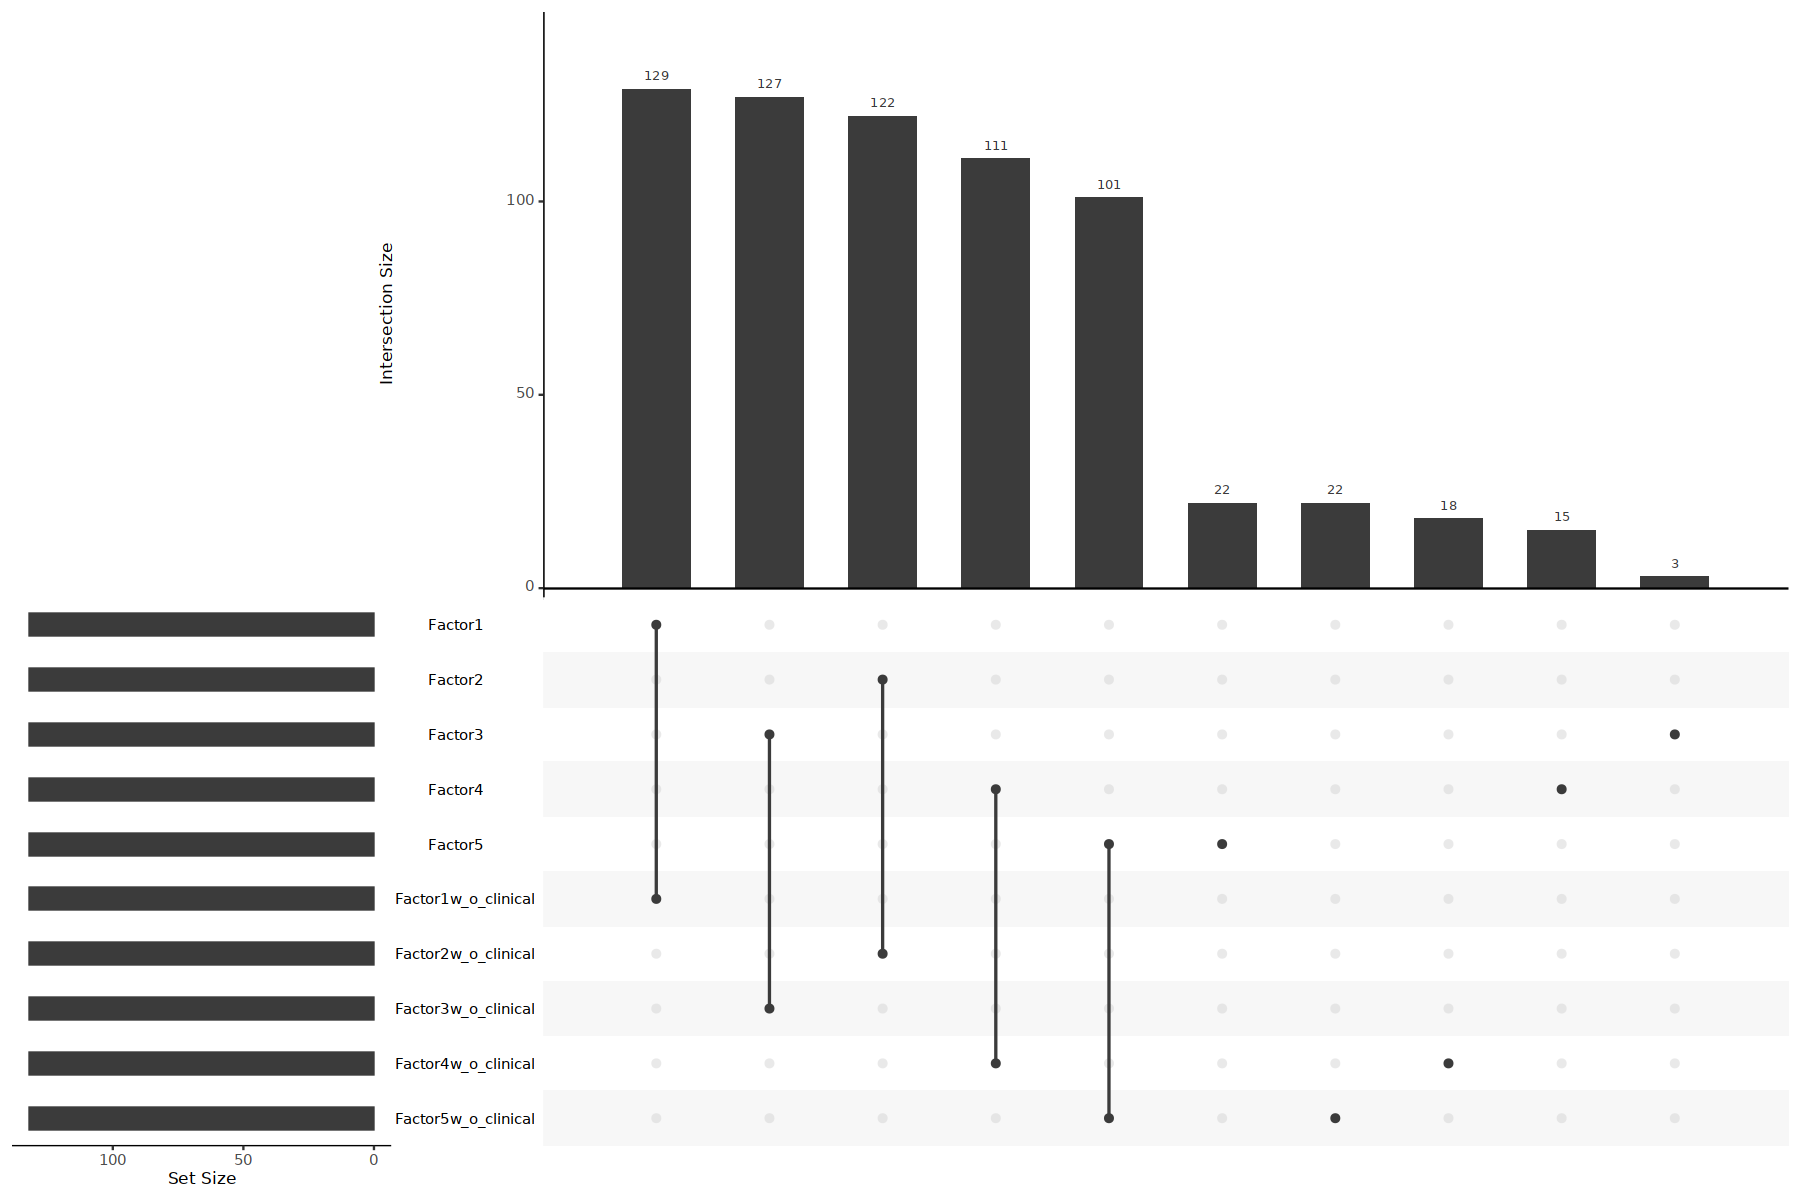

In [73]:
overlap 